In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
#import data
train = pd.read_csv('../data/raw/Emergent_NAACL2016/emergent/url-versions-2015-06-14-clean-train.csv')
train.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
#create features
align_feature = pd.read_csv('../data/processed/features/alignment_feature.csv')
cosine_feature = pd.read_csv('../data/processed/features/cosine_feature.csv')
bow_feature = pd.read_csv('../data/processed/features/headline_BoW.csv')
qmark_feature = pd.read_csv('../data/processed/features/headline_Qmark.csv')
neg_alignment_feature = pd.read_csv('../data/processed/features/neg_alignment_feature.csv')
root_dist_feature = pd.read_csv('../data/processed/features/root_dist_min.csv')
svo_feature = pd.read_csv('../data/processed/features/svo_Lexical.csv')

In [4]:
train = pd.merge(train, align_feature, on="articleId")
train = pd.merge(train, cosine_feature, on="articleId")
train = pd.merge(train, bow_feature, on="articleId")
train = pd.merge(train, qmark_feature, on="articleId")
train = pd.merge(train, neg_alignment_feature, on="articleId")
train = pd.merge(train, root_dist_feature, on="articleId")
train = pd.merge(train, svo_feature, on="articleId")

In [5]:
# merge datasets and shuuffle with random seed
seed = 1234

train = sklearn.utils.shuffle(train, random_state=seed)

In [6]:
for_ = train.index[train.articleHeadlineStance == "for"].to_list()
against_ = train.index[train.articleHeadlineStance == "against"].to_list()
observ_ = train.index[train.articleHeadlineStance == "observing"].to_list()

In [7]:
train = train.to_numpy()[:,5:]

from sklearn.preprocessing import normalize
train = normalize(train)

In [8]:
from sklearn.manifold import TSNE

tsne_em = TSNE(n_components=2).fit_transform(train)
tsne_em.shape

(2071, 2)

In [10]:
tsne_em

array([[-27.559446 ,  10.40955  ],
       [ 36.006447 ,  -0.9178407],
       [ 46.494904 ,  -1.3652118],
       ...,
       [-27.11904  ,  12.473772 ],
       [-16.97646  , -10.819135 ],
       [ -7.6914515,   5.4332833]], dtype=float32)

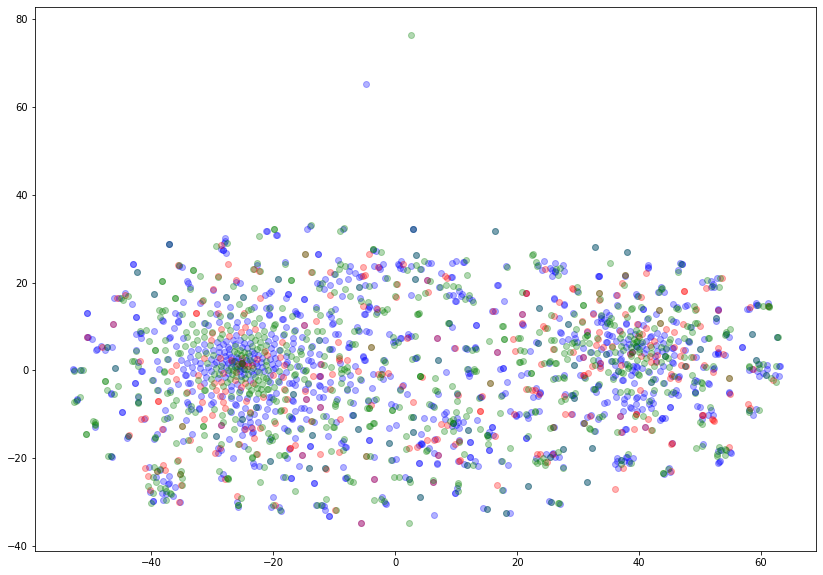

In [11]:
import matplotlib.pyplot as plt

alpha = 0.3

fig = plt.figure(figsize=(14,10))
plt.scatter(tsne_em[for_ ,0], tsne_em[for_,1], c='blue', alpha=alpha)
plt.scatter(tsne_em[against_ ,0], tsne_em[against_,1], c='red', alpha=alpha)
plt.scatter(tsne_em[observ_ ,0], tsne_em[observ_,1], c='green', alpha=alpha)
plt.show()

In [12]:
# Isomap
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

isomap_map = Isomap(n_components=2)

Iso_em = isomap_map.fit_transform(train)
Iso_em.shape

(2071, 2)

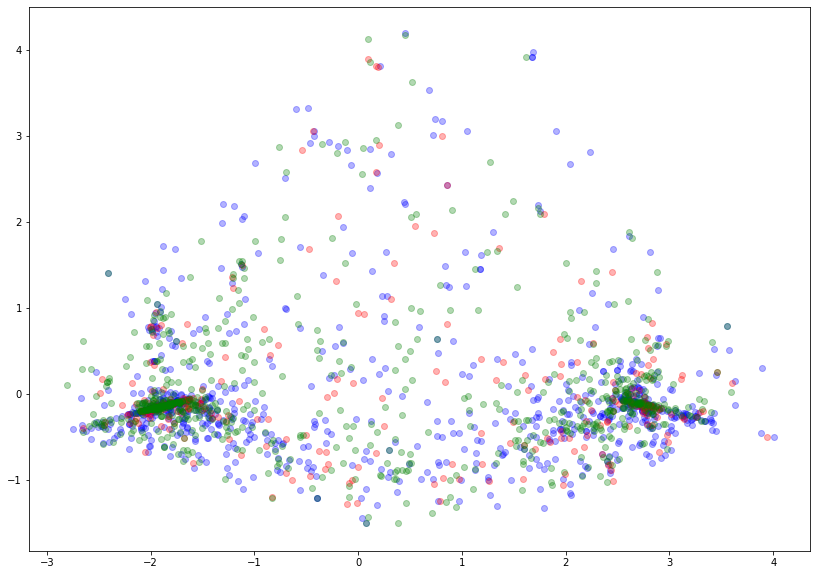

In [13]:
import matplotlib.pyplot as plt

alpha = 0.3

fig = plt.figure(figsize=(14,10))
plt.scatter(Iso_em[for_ ,0], Iso_em[for_,1], c='blue', alpha=alpha)
plt.scatter(Iso_em[against_ ,0], Iso_em[against_,1], c='red', alpha=alpha)
plt.scatter(Iso_em[observ_ ,0], Iso_em[observ_,1], c='green', alpha=alpha)
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture